# Guessing the amount of medals that team would get on Olympics

Dataset represents information about each team on olympics. Task is to predict, how many medals would each team earn using ML

In [65]:
!pip3 install category_encoders

# Imports

In [66]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from category_encoders.target_encoder import TargetEncoder
import numpy as np

# Data Analysis

In [67]:
df = pd.read_csv('teams.csv')
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


## Removing odd columns

In [68]:
df = df.drop(columns=['height', 'weight', 'events', 'team'])

In [69]:
df

,country,year,athletes,age,medals,prev_medals,prev_3_medals
0,Afghanistan,1964,8,22.0,0,0.0,0.0
1,Afghanistan,1968,5,23.2,0,0.0,0.0
2,Afghanistan,1972,8,29.0,0,0.0,0.0
3,Afghanistan,1980,11,23.6,0,0.0,0.0
4,Afghanistan,2004,5,18.6,0,0.0,0.0
...,...,...,...,...,...,...,...
2139,Zimbabwe,2000,26,25.0,0,0.0,0.0
2140,Zimbabwe,2004,14,25.1,3,0.0,0.0
2141,Zimbabwe,2008,16,26.1,4,3.0,1.0
2142,Zimbabwe,2012,9,27.3,0,4.0,2.3


## Correlation to medals

In [70]:
df.corr()['medals']

<ipython-input-70-77c731b8af20>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['medals']


year            -0.021603
athletes         0.840817
age              0.025096
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64

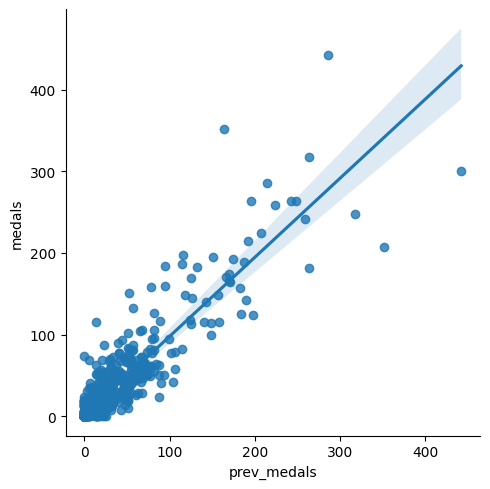

In [71]:
sns.lmplot(data=df, x='prev_medals', y='medals', fit_reg=True);

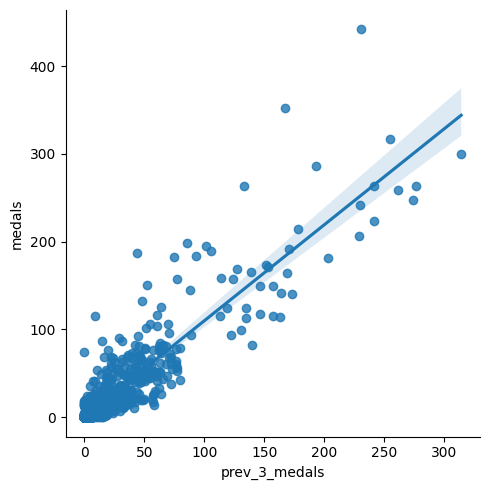

In [72]:
sns.lmplot(data=df, x='prev_3_medals', y='medals', fit_reg=True);

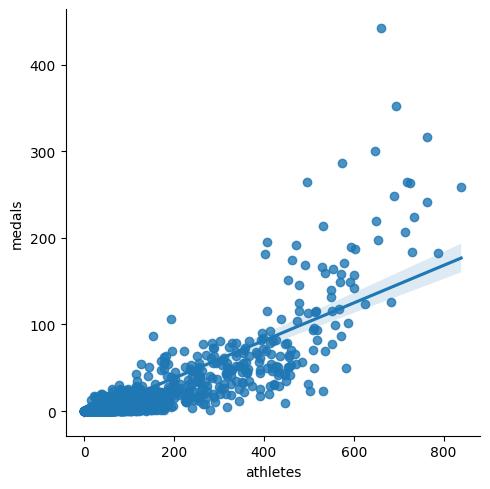

In [73]:
sns.lmplot(data=df, x='athletes', y='medals', fit_reg=True);

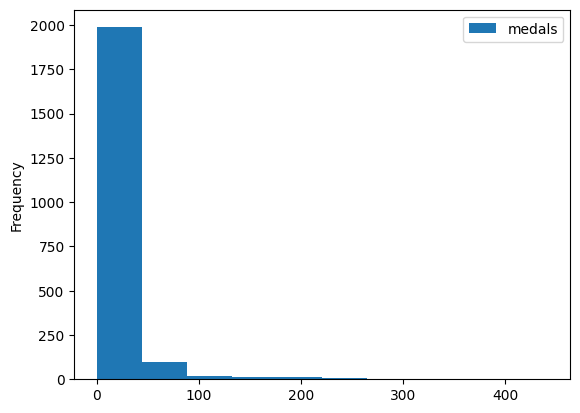

In [74]:
df.plot.hist(y='medals');

In [75]:
a = (df.groupby('country')
        .agg({'medals' : 'mean'})
        .max())
a

medals    268.0
dtype: float64

## Removing NA's

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        2144 non-null   object 
 1   year           2144 non-null   int64  
 2   athletes       2144 non-null   int64  
 3   age            2144 non-null   float64
 4   medals         2144 non-null   int64  
 5   prev_medals    2014 non-null   float64
 6   prev_3_medals  2014 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 117.4+ KB


In [77]:
df[df.isna().any(axis=1)]

,country,year,athletes,age,medals,prev_medals,prev_3_medals
19,Albania,1992,9,25.3,0,NaN,NaN
26,Algeria,1964,7,26.0,0,NaN,NaN
39,Andorra,1976,3,28.3,0,NaN,NaN
50,Angola,1980,17,17.4,0,NaN,NaN
59,Antigua and Barbuda,1976,17,23.2,0,NaN,NaN
...,...,...,...,...,...,...,...
2092,Saint Vincent and the Grenadines,1988,6,20.5,0,NaN,NaN
2103,North Yemen,1984,3,27.7,0,NaN,NaN
2105,Yemen,1992,8,19.6,0,NaN,NaN
2112,South Yemen,1988,5,23.6,0,NaN,NaN


In [78]:
df.dropna(inplace=True)
df

,country,year,athletes,age,medals,prev_medals,prev_3_medals
0,Afghanistan,1964,8,22.0,0,0.0,0.0
1,Afghanistan,1968,5,23.2,0,0.0,0.0
2,Afghanistan,1972,8,29.0,0,0.0,0.0
3,Afghanistan,1980,11,23.6,0,0.0,0.0
4,Afghanistan,2004,5,18.6,0,0.0,0.0
...,...,...,...,...,...,...,...
2139,Zimbabwe,2000,26,25.0,0,0.0,0.0
2140,Zimbabwe,2004,14,25.1,3,0.0,0.0
2141,Zimbabwe,2008,16,26.1,4,3.0,1.0
2142,Zimbabwe,2012,9,27.3,0,4.0,2.3


# Data preparation

In [79]:
X = df.drop(columns=['medals'])

In [80]:
y = df['medals']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
X_train

,country,year,athletes,age,prev_medals,prev_3_medals
56,Angola,2008,33,27.2,0.0,0.0
1144,Liberia,2004,2,23.0,0.0,0.0
920,Iran,2000,34,24.4,3.0,2.3
1242,Malaysia,1992,30,25.1,0.0,0.0
698,Gabon,2008,4,25.5,0.0,0.0
...,...,...,...,...,...,...
891,Indonesia,2004,39,24.4,8.0,6.7
1293,Mongolia,1992,38,25.0,1.0,2.0
1758,San Marino,2016,4,34.0,0.0,0.0
602,El Salvador,1992,6,19.8,0.0,0.0


In [83]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train
X_y_train

,country,year,athletes,age,prev_medals,prev_3_medals,y
56,Angola,2008,33,27.2,0.0,0.0,0
1144,Liberia,2004,2,23.0,0.0,0.0,0
920,Iran,2000,34,24.4,3.0,2.3,4
1242,Malaysia,1992,30,25.1,0.0,0.0,2
698,Gabon,2008,4,25.5,0.0,0.0,0
...,...,...,...,...,...,...,...
891,Indonesia,2004,39,24.4,8.0,6.7,5
1293,Mongolia,1992,38,25.0,1.0,2.0,2
1758,San Marino,2016,4,34.0,0.0,0.0,0
602,El Salvador,1992,6,19.8,0.0,0.0,0


# Target encoding

In [84]:
target_encoder = TargetEncoder()
target_encoder.fit(X_y_train['country'], X_y_train['y'])

TargetEncoder(cols=['country'])

In [85]:
X_y_train['country_encoded'] = target_encoder.transform(X_y_train['country'])
X_y_train[X_y_train['country'] == 'Angola']

,country,year,athletes,age,prev_medals,prev_3_medals,y,country_encoded
56,Angola,2008,33,27.2,0.0,0.0,0,9.097974
53,Angola,1996,30,25.5,0.0,0.0,0,9.097974
55,Angola,2004,30,26.7,0.0,0.0,0,9.097974
54,Angola,2000,30,26.8,0.0,0.0,0,9.097974


In [86]:
X_y_train.drop(columns='country', inplace=True)

In [87]:
X_train = X_y_train.drop(columns='y')

In [88]:
model = LinearRegression()

In [89]:
X_train

,year,athletes,age,prev_medals,prev_3_medals,country_encoded
56,2008,33,27.2,0.0,0.0,9.097974
1144,2004,2,23.0,0.0,0.0,8.203962
920,2000,34,24.4,3.0,2.3,8.862357
1242,1992,30,25.1,0.0,0.0,8.342706
698,2008,4,25.5,0.0,0.0,8.231710
...,...,...,...,...,...,...
891,2004,39,24.4,8.0,6.7,8.851477
1293,1992,38,25.0,1.0,2.0,9.113082
1758,2016,4,34.0,0.0,0.0,7.774107
602,1992,6,19.8,0.0,0.0,8.592967


In [90]:
model.fit(X_train, y_train)

LinearRegression()

In [91]:
model.score(X_train, y_train)

0.8863174368966091

In [92]:
X_y_test = X_test.copy(deep=True)
X_y_test['y'] = y_test

target_encoder = TargetEncoder()
target_encoder.fit(X_y_test['country'], X_y_test['y'])

X_y_test['country_encoded'] = target_encoder.transform(X_y_test['country'])
X_y_test

,country,year,athletes,age,prev_medals,prev_3_medals,y,country_encoded
1407,Nicaragua,2008,7,26.7,0.0,0.0,0,9.620637
1620,Puerto Rico,1976,112,22.9,0.0,0.0,1,9.691563
1483,New Zealand,2008,201,26.5,6.0,6.3,15,12.457659
1806,Sudan,2016,6,21.3,0.0,0.3,0,9.530709
1464,Norway,2012,69,27.3,22.0,24.0,17,11.938628
...,...,...,...,...,...,...,...,...
1422,Netherlands,2012,222,27.1,61.0,72.3,69,15.507457
2115,Yugoslavia,1972,212,24.6,29.0,20.3,18,12.094235
1770,Somalia,2000,2,23.0,0.0,0.0,0,9.752283
1317,Mali,2000,5,19.8,0.0,0.0,0,9.620637


In [93]:
X_y_test.drop(columns='country', inplace=True)

In [94]:
X_y_test

,year,athletes,age,prev_medals,prev_3_medals,y,country_encoded
1407,2008,7,26.7,0.0,0.0,0,9.620637
1620,1976,112,22.9,0.0,0.0,1,9.691563
1483,2008,201,26.5,6.0,6.3,15,12.457659
1806,2016,6,21.3,0.0,0.3,0,9.530709
1464,2012,69,27.3,22.0,24.0,17,11.938628
...,...,...,...,...,...,...,...
1422,2012,222,27.1,61.0,72.3,69,15.507457
2115,1972,212,24.6,29.0,20.3,18,12.094235
1770,2000,2,23.0,0.0,0.0,0,9.752283
1317,2000,5,19.8,0.0,0.0,0,9.620637


In [95]:
X_test = X_y_test.drop(columns='y')

In [96]:
X_test

,year,athletes,age,prev_medals,prev_3_medals,country_encoded
1407,2008,7,26.7,0.0,0.0,9.620637
1620,1976,112,22.9,0.0,0.0,9.691563
1483,2008,201,26.5,6.0,6.3,12.457659
1806,2016,6,21.3,0.0,0.3,9.530709
1464,2012,69,27.3,22.0,24.0,11.938628
...,...,...,...,...,...,...
1422,2012,222,27.1,61.0,72.3,15.507457
2115,1972,212,24.6,29.0,20.3,12.094235
1770,2000,2,23.0,0.0,0.0,9.752283
1317,2000,5,19.8,0.0,0.0,9.620637


## Score of a LinearRegression model

In [97]:
model.score(X_test, y_test)

0.9178347517990072

In [98]:
def score_model(model, X_test, y_test):
    y_preds = model.predict(X_test)

    errs = []

    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y - y_pred))

    mae = sum(errs) / len(errs)

    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - sum(err**2 for err in errs) / sum((y - mean_y_test) ** 2 for y in y_test)

    return mae, r2

In [99]:
score_model(model, X_test, y_test)

(4.1285422469248925, 0.9178347517990071)

In [100]:
df.describe()

,year,athletes,age,medals,prev_medals,prev_3_medals
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,1995.227408,76.329692,24.812612,10.990070,10.248759,9.449901
std,15.227727,129.799427,2.758258,33.627528,31.951920,28.232227
min,1964.000000,1.000000,17.000000,0.000000,0.000000,0.000000
25%,1984.000000,7.000000,23.300000,0.000000,0.000000,0.000000
50%,1996.000000,21.000000,24.700000,0.000000,0.000000,0.300000
75%,2008.000000,74.750000,26.100000,5.000000,4.000000,4.650000
max,2016.000000,839.000000,66.000000,442.000000,442.000000,314.000000


In [101]:
ridge_model = linear_model.Ridge(alpha=10).fit(X_train, y_train)

In [102]:
ridge_model.score(X_train, y_train)

0.8863174262508688

## Score of a RidgeModel

In [103]:
ridge_model.score(X_test, y_test)

0.9178468999817562

In [104]:
model_random_forest_100 = RandomForestRegressor(n_estimators=100,
                                                min_samples_leaf=5,
                                                max_features=2,
                                                criterion='squared_error')

In [105]:
model_random_forest_100.fit(X_train, y_train)

RandomForestRegressor(max_features=2, min_samples_leaf=5)

In [106]:
model_random_forest_100.score(X_train, y_train)

0.9346419968766189

## Score of a RandomForest baseline

In [107]:
model_random_forest_100.score(X_test, y_test)

0.9178800432545252

## Randomizer of parameters for RandomForest

In [108]:
def create_and_test_model(X_train, X_test, y_train, y_test, iterations=1):
    results_arr = []
    feats_arr = []

    for i in range(iterations):
        n_estimators = np.random.randint(50, 350)
        min_samples_leaf = np.random.randint(2, 15)
        max_features = np.random.randint(1, X_train.shape[1] + 1)

        feats_arr.append([n_estimators, min_samples_leaf, max_features])



        model = RandomForestRegressor(n_estimators=n_estimators,
                                      min_samples_leaf=min_samples_leaf,
                                      max_features=max_features,
                                      criterion='squared_error')
        model.fit(X_train, y_train)

        results_arr.append(model.score(X_test, y_test))

        maximum = max(results_arr)
        idx = results_arr.index(maximum)

    return maximum, feats_arr[idx]

0.9315222773472048 [109, 2, 4]

In [109]:
maxix, feat = create_and_test_model(X_train, X_test, y_train, y_test)
print(maxix, feat)

0.9108833592166378 [131, 12, 3]


In [114]:
model_random_forest_perfect = RandomForestRegressor(n_estimators=109,
                                                min_samples_leaf=2,
                                                max_features=4,
                                                criterion='squared_error')
model_random_forest_perfect.fit(X_train, y_train)

RandomForestRegressor(max_features=4, min_samples_leaf=2, n_estimators=109)

## Best scores that I could get

In [115]:
model_random_forest_perfect.score(X_train, y_train)

0.9727097856481525

In [116]:
model_random_forest_perfect.score(X_test, y_test)

0.9238343182674715


*   Best score on test data: 0.92383...
